Credit card fraud happens when consumers give their credit card number to unfamiliar individuals, when cards are lost or stolen, when mail is diverted from the intended recipient and taken by criminals, or when employees of a business copy the cards or card numbers of a cardholder. In this notebook we will develop a few ML models using anonymized credit card transaction data. The
challenge behind fraud detection is that frauds are far less common as compared to legal transactions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('bmh')

In [ ]:
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,105067.000000,105067.000000,105067.000000,105067.000000,105067.000000,105067.000000,105067.000000,105067.000000,105067.000000,105067.000000,...,105067.000000,105067.000000,105067.000000,105066.000000,105066.000000,105066.000000,105066.000000,105066.000000,105066.000000,105066.000000
mean,43680.301455,-0.258318,-0.029705,0.683599,0.156974,-0.283527,0.098924,-0.116800,0.057275,-0.050479,...,-0.029851,-0.105483,-0.037181,0.009834,0.133576,0.026062,0.001671,0.001795,96.626111,0.002208
std,17527.890732,1.851801,1.650087,1.319498,1.345212,1.351589,1.301365,1.214204,1.236547,1.112787,...,0.744325,0.639981,0.626223,0.595669,0.440315,0.491947,0.392645,0.321359,262.315215,0.046939
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,33975.500000,-1.024715,-0.598212,0.178273,-0.714182,-0.907139,-0.644227,-0.606695,-0.135125,-0.696261,...,-0.223703,-0.531229,-0.177131,-0.323208,-0.130802,-0.323481,-0.061425,-0.005146,7.160000,0.000000
50%,45510.000000,-0.260627,0.075873,0.759148,0.184867,-0.318318,-0.153233,-0.072970,0.077001,-0.118121,...,-0.056348,-0.081414,-0.049651,0.065708,0.172075,-0.069141,0.010581,0.023346,25.500000,0.000000
75%,57712.000000,1.154766,0.735425,1.385199,1.026157,0.245212,0.494042,0.409551,0.368539,0.549453,...,0.121112,0.315794,0.080780,0.407051,0.421563,0.295664,0.084462,0.076727,87.540000,0.000000
max,69350.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,27.202839,10.503090,19.002942,4.016342,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df.dtypes

,0
Time,int64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


Non-fraud transactions: 99.78%
Fraud transactions: 0.22%


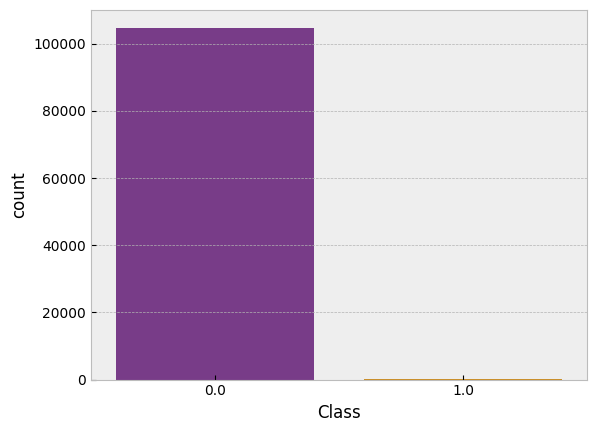

In [ ]:
sns.countplot(x='Class', data=df, palette='CMRmap')
print('Non-fraud transactions: {}%'.format(round(df.Class.value_counts()[0]/len(df)*100.0,2)))
print('Fraud transactions: {}%'.format(round(df.Class.value_counts()[1]/len(df)*100.0,2)))

This dataset is severely imbalanced (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting. There is a type of oversampling called SMOTE (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class

Also we shouldn't use accuracy score as a metric with imbalanced datasets (will be usually high and misleading), instead we should use f1-score, precision/recall score and confusion matrix

Recall of fraud cases (sensitivity) summarizes true positive rate (True positive/True positive + False Negative) - how many cases we got correct out of all the positive ones
Recall of non-fraud (specificity) summarizes true negative rate (True negative/True negative + False positive) - how many cases we got correct out of all the negative ones
Precision of fraud cases (True positive/True positive + False positive) summarizes the accuracy of fraud cases detected - out of all predicted as fraud, how many are correct
Precision of non-fraud cases (True negative/True negative + False negative) summarizes the accuracy of non-fraud cases detected - out of all predicted as non-fraud, how many are correct
F1-score is the harmonic mean of recall and precision

Text(0.5, 1.0, 'Distribution of Amount')

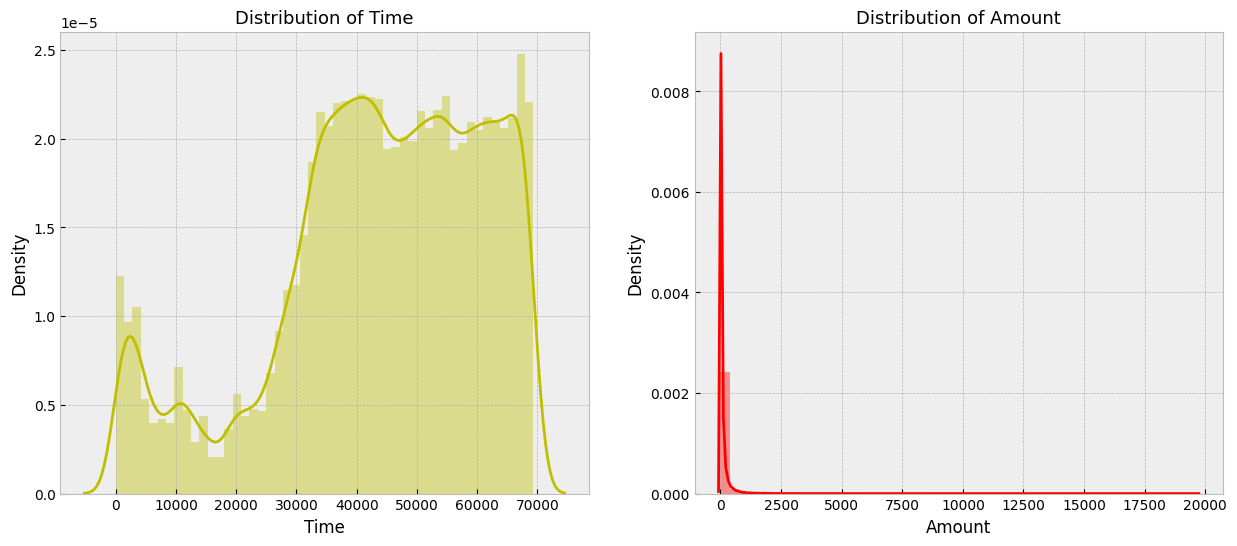

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1 = sns.distplot(df['Time'], ax=ax1, color='y')
ax2 = sns.distplot(df['Amount'], ax=ax2, color='r')
ax1.set_title('Distribution of Time', fontsize=13)
ax2.set_title('Distribution of Amount', fontsize=13)

To normalize the distribution we are going to use a method called Feature Scaling. In our case it is better to use the Robust Scaler algorithm because it's robust to outliers

In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
df['scaled_amount'] = rs.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rs.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [ ]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(0, 'scaled_time', scaled_time)
df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.917300,1.544165,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0
1,-1.917300,-0.283777,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0
2,-1.917258,4.393630,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0
3,-1.917258,1.219209,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0
4,-1.917216,0.553496,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0


Logistic Regression without SMOTE

NaNs found in the data before splitting. Removing rows with NaNs.
Data shape after removing NaNs: x=(105066, 30), y=(105066, 1)
              precision    recall  f1-score   support

   Non-fraud       1.00      1.00      1.00     20959
       Fraud       0.80      0.64      0.71        55

    accuracy                           1.00     21014
   macro avg       0.90      0.82      0.85     21014
weighted avg       1.00      1.00      1.00     21014



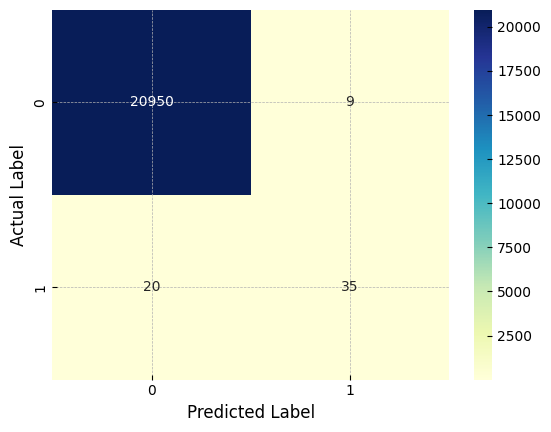

In [ ]:
from sklearn.model_selection import train_test_split as holdout
x = np.array(df.iloc[:, df.columns != 'Class'])
y = np.array(df.iloc[:, df.columns == 'Class'])

# Check for NaNs in x and y before splitting
if np.isnan(x).any() or np.isnan(y).any():
    print("NaNs found in the data before splitting. Removing rows with NaNs.")
    # Find indices of rows with NaNs
    nan_rows_x = np.isnan(x).any(axis=1)
    nan_rows_y = np.isnan(y).any(axis=1)
    nan_rows = nan_rows_x | nan_rows_y # Combine indices from both x and y

    # Remove rows with NaNs
    x = x[~nan_rows]
    y = y[~nan_rows]
    print(f"Data shape after removing NaNs: x={x.shape}, y={y.shape}")


x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, precision_score, recall_score, accuracy_score
lg = LogisticRegression()
lg.fit(x_train, y_train)
y_pred = lg.predict(x_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

labels = ['Non-fraud', 'Fraud']
print(classification_report(y_test, y_pred, target_names=labels))

As we can see this is not a good model, because it is biased towards majority class and the recall in minority class is not as high as disired

Transaction Number x_train dataset:  (84052, 30)
Transaction Number y_train dataset:  (84052, 1)
Transaction Number x_test dataset:  (21014, 30)
Transaction Number y_test dataset:  (21014, 1)
Before OverSampling, counts of label '1': [177]
Before OverSampling, counts of label '0': [83875] 

After OverSampling, the shape of train_x: (167750, 30)
After OverSampling, the shape of train_y: (167750,) 

After OverSampling, counts of label '1', %: 50.0
After OverSampling, counts of label '0', %: 50.0


<Axes: ylabel='count'>

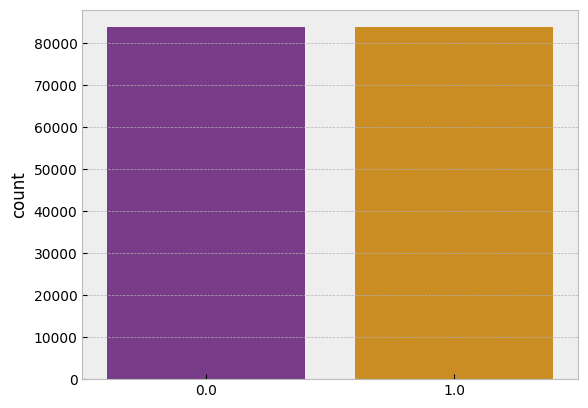

In [ ]:
from imblearn.over_sampling import SMOTE

print("Transaction Number x_train dataset: ", x_train.shape)
print("Transaction Number y_train dataset: ", y_train.shape)
print("Transaction Number x_test dataset: ", x_test.shape)
print("Transaction Number y_test dataset: ", y_test.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
# Changed fit_sample to fit_resample
x_train_s, y_train_s = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(x_train_s.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_s.shape))

print("After OverSampling, counts of label '1', %: {}".format(sum(y_train_s==1)/len(y_train_s)*100.0,2))
print("After OverSampling, counts of label '0', %: {}".format(sum(y_train_s==0)/len(y_train_s)*100.0,2))

sns.countplot(x=y_train_s, palette='CMRmap')

Now the dataset is balanced, so we can build a Logistic Regression model with SMOTE. One important thing to point out here is that we used SMOTE after cross validation in order to avoid data leakage problem and hence overfitting

Logistic Regression with SMOTE

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     20959
         1.0       0.10      0.89      0.18        55

    accuracy                           0.98     21014
   macro avg       0.55      0.94      0.59     21014
weighted avg       1.00      0.98      0.99     21014



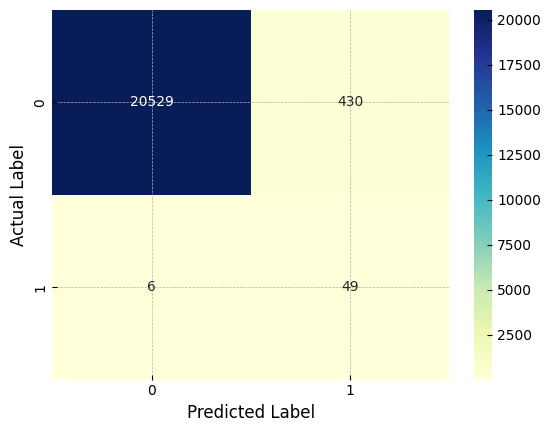

In [ ]:
lg = LogisticRegression()
lg.fit(x_train_s, y_train_s)
y_pred = lg.predict(x_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_pred))

Text(0.5, 1.0, 'Precision Recall Curve')

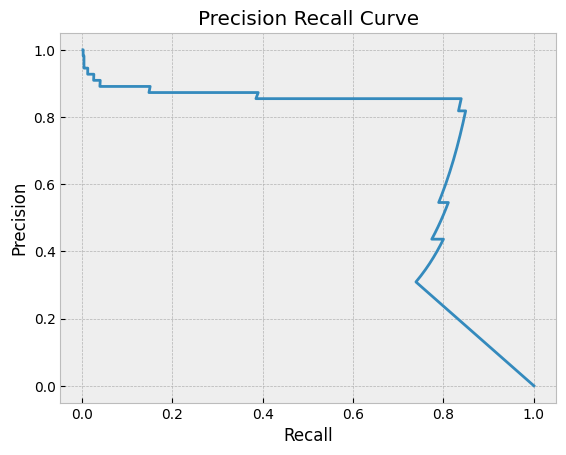

In [ ]:
y_pred_prob = lg.predict_proba(x_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

We got a high recall which means our model is able to detect the highest number of fraud transactions, while the precision is very low which is not good because it means that the model classifies a lot of non-fraud transactions as fraud. The customers of a financial institution are not going to be satisfied with that fact and may even stop using the service of that financial institution. So in this case it's also important to have a high precision, which we are going to try to achieve with Random Forest

Random Forest Classifier with SMOTE

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20959
         1.0       0.88      0.80      0.84        55

    accuracy                           1.00     21014
   macro avg       0.94      0.90      0.92     21014
weighted avg       1.00      1.00      1.00     21014



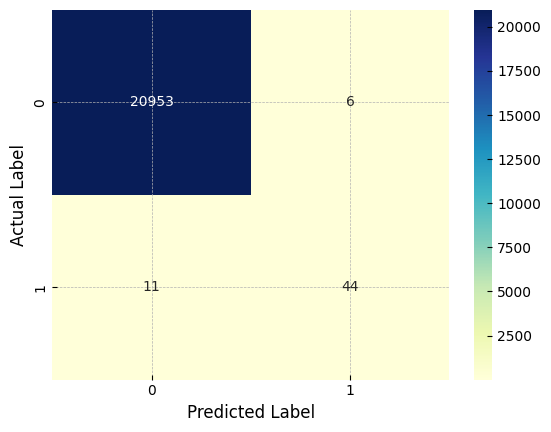

In [22]:
from sklearn.ensemble import RandomForestClassifier as rfc
rand_f = rfc(n_estimators=1000, min_samples_split=10, min_samples_leaf=1,
           max_features='sqrt', max_leaf_nodes=None, # Changed 'auto' to 'sqrt'
           oob_score=True, n_jobs=-1, random_state=1)
rand_f.fit(x_train_s, y_train_s)
y_pred = rand_f.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20959
         1.0       0.88      0.80      0.84        55

    accuracy                           1.00     21014
   macro avg       0.94      0.90      0.92     21014
weighted avg       1.00      1.00      1.00     21014



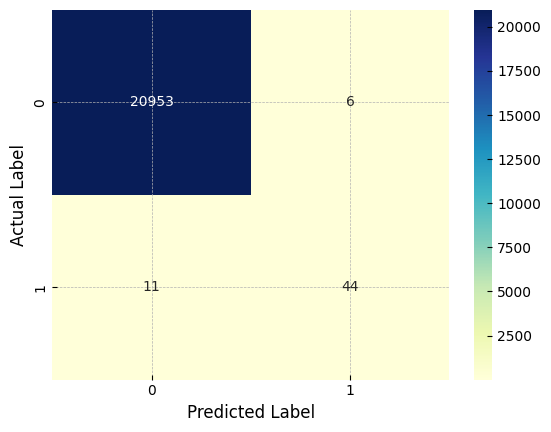

In [24]:
from sklearn.ensemble import RandomForestClassifier as rfc
rand_f = rfc(n_estimators=1000, min_samples_split=10, min_samples_leaf=1,
           max_features='sqrt', # Changed 'auto' to 'sqrt' based on error message
           max_leaf_nodes=None,
           oob_score=True, n_jobs=-1, random_state=1)
rand_f.fit(x_train_s, y_train_s)
y_pred = rand_f.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_pred))

Text(0.5, 1.0, 'Precision Recall Curve')

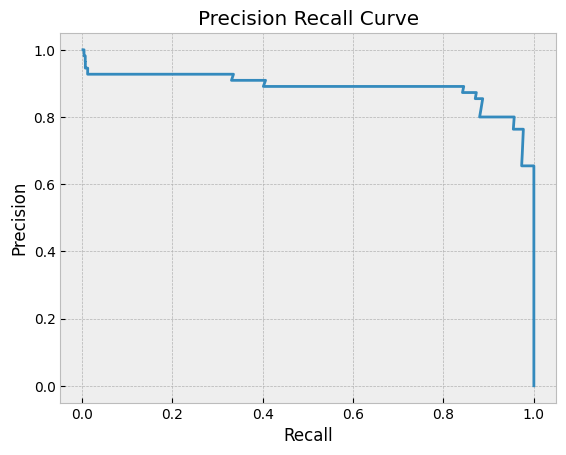

In [25]:
y_pred_prob = rand_f.predict_proba(x_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

So Random Forest with SMOTE performed better than Logistic Regression overall allowing us to get high recall and high precision at the same time. Even though the recall has decreased a little bit, we were able to increase the precision significantly, which means a lot in the case of fraud detection and as we know it is a trade-off

Feature importance ranking


1.V14(0.183785)
2.V10(0.138493)
3.V12(0.107314)
4.V3(0.093221)
5.V17(0.085063)
6.V4(0.069835)
7.V11(0.058260)
8.V16(0.037556)
9.V7(0.031552)
10.V2(0.020430)
11.V27(0.019705)
12.V9(0.018407)
13.V18(0.014115)
14.V5(0.011193)
15.V6(0.010078)
16.V21(0.009339)
17.scaled_amount(0.008669)
18.V13(0.008599)
19.V1(0.007819)
20.V23(0.007807)
21.V19(0.007474)
22.V8(0.007348)
23.V25(0.006385)
24.scaled_time(0.005931)
25.V24(0.005859)
26.V15(0.005806)
27.V28(0.005765)
28.V20(0.005628)
29.V26(0.004323)
30.V22(0.004243)


<BarContainer object of 30 artists>

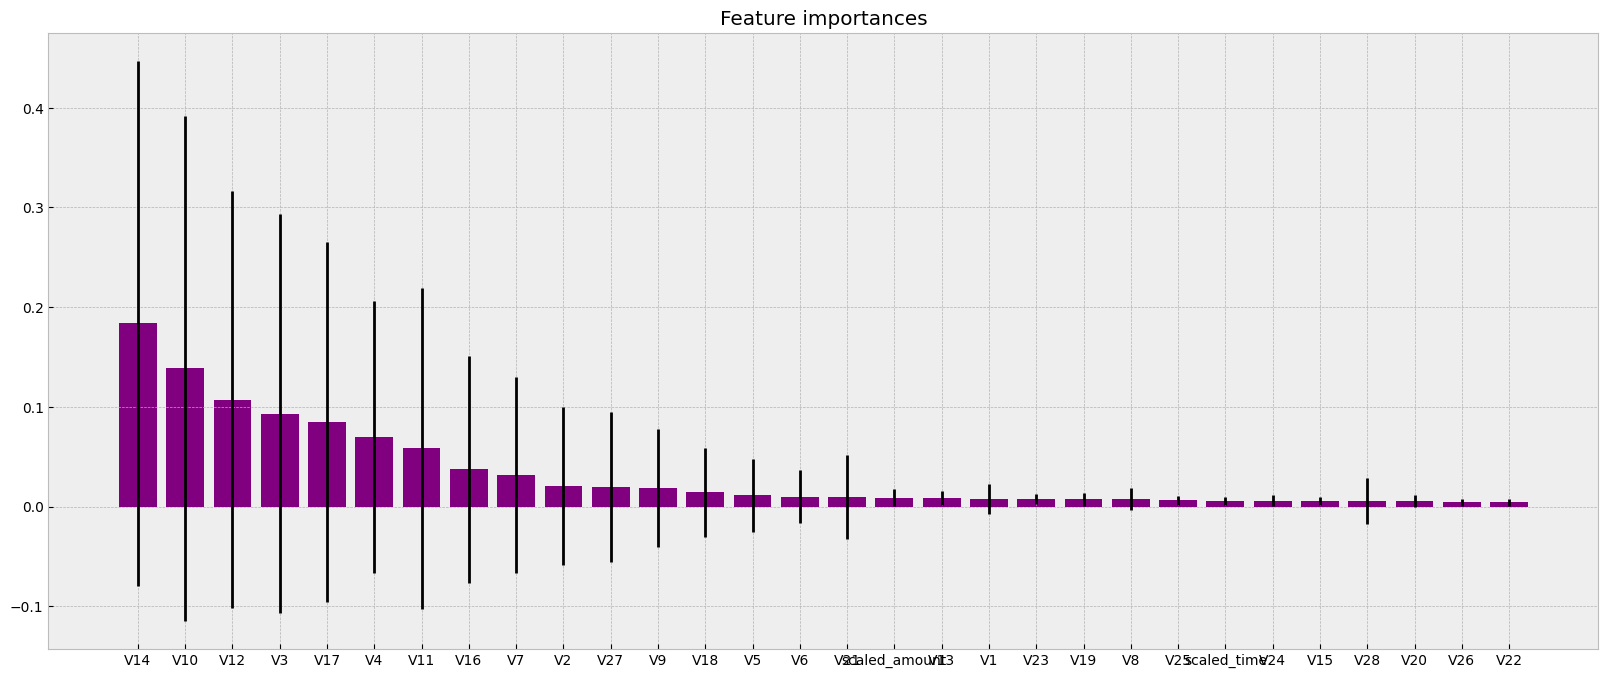

In [26]:
print('Feature importance ranking\n\n')
importances = rand_f.feature_importances_
std = np.std([tree.feature_importances_ for tree in rand_f.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = df.columns
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))
plt.figure(figsize=(20, 8))
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="purple", yerr=std[indices], align='center')

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20959
         1.0       0.90      0.84      0.87        55

    accuracy                           1.00     21014
   macro avg       0.95      0.92      0.93     21014
weighted avg       1.00      1.00      1.00     21014



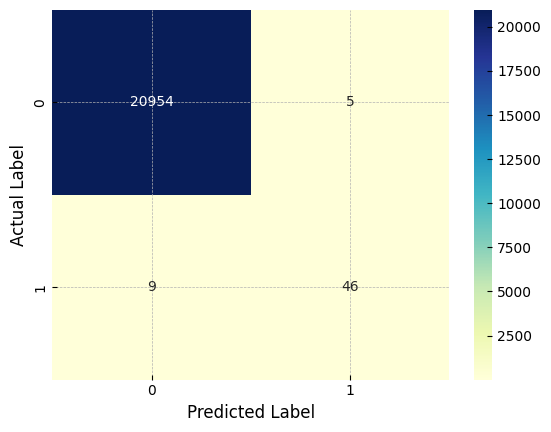

In [27]:
import xgboost as xgb
model = xgb.XGBClassifier(n_estimators = 5000, max_depth = 30, learning_rate = 0.01)
model.fit(x_train_s, y_train_s)
y_pred = model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_pred))

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential([Dense(input_dim=30, units=16, activation='relu'),
                   Dense(units=24, activation='relu'),
                   Dropout(0.5),
                   Dense(units=20, activation='relu'),
                   Dense(units=24, activation='relu'),
                   Dense(units=1, activation='sigmoid')])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │           408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 24)             │           504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,933 (7.55 KB)

 Trainable params: 1,933 (7.55 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train_s, y_train_s, batch_size=15, epochs=15)

Epoch 1/15
11184/11184 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.9661 - loss: 0.0806
Epoch 2/15
11184/11184 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9987 - loss: 0.0071
Epoch 3/15
11184/11184 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.9991 - loss: 0.0047
Epoch 4/15
11184/11184 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.9991 - loss: 0.0045
Epoch 5/15
11184/11184 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.9994 - loss: 0.0032
Epoch 6/15
11184/11184 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.9995 - loss: 0.0030
Epoch 7/15
11184/11184 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9996 - loss: 0.0022
Epoch 8/15
11184/11184 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9996 - loss: 0.0030
Epoch 9/15
11184/11184 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.9997 - loss: 0.0024
Epoch 10/15
11184/11184 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.9997 - loss: 0.0030
Epoch 11/15
11184/11184 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9996 - loss: 0.00

<Axes: >

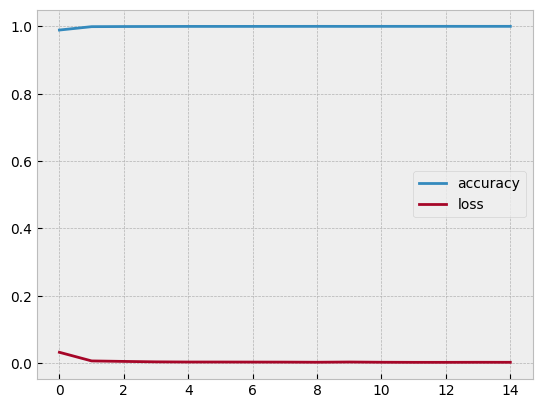

In [30]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [31]:
score = model.evaluate(x_test, y_test)
print(score)

657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9984 - loss: 0.0945
[0.05736643075942993, 0.9984295964241028]


657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20959
         1.0       0.65      0.87      0.74        55

    accuracy                           1.00     21014
   macro avg       0.82      0.94      0.87     21014
weighted avg       1.00      1.00      1.00     21014



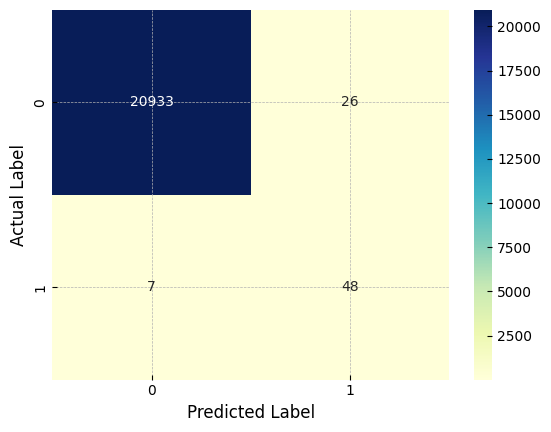

In [33]:
# y_pred = model.predict_classes(x_test) # This method is deprecated
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_pred))

Conclusions

Good prediction results can be achieved with imbalanced datasets as well as with balanced ones
Random Forest and XGBoost Classifiers gave us the best results being able to detect more than 80% fraud transactions and at the same time not classifying a lot of non-fraud transactions as fraud
There is no perfect model and there will always be a trade-off between precision and recall. It is up to the company and its objectives to decide which approach is the best in each particular situation